#소수
소수(素數, 발음: [소쑤], 문화어: 씨수, 영어: prime number)는 1보다 큰 자연수 중 1과 자기 자신만을 약수로 가지는 수다.
 1과 그 수 자신 이외의 자연수로는 나눌 수 없는 자연수로 정의하기도 한다.

 소수의 개수는 무한하며, 이는 유클리드의 정리에 의하여 최초로 논증되었다. 소수와 합성수를 구분해낼 수 있는 명확한 공식은 지금까지도 밝혀지지 않은 상태이나, 대역적으로 자연수 중 소수의 비율의 근사치를 예측하는 모델로는 여러가지가 알려져 있다. 이러한 방향으로의 연구의 첫 결과는 19세기 말에 증명된 소수 정리인데, 이는 무작위로 선택된 한 수가 소수일 확률은 그 수의 자릿수, 곧 로그값에 반비례함을 알려준다.

## 소수판별 알고리즘 



###소수는 어떻게 구분하는가
특정 수 N이 소수인지 아닌지 구하는 법은 바로 이 특징을 활용하여 2부터 N-1 까지의 수로 해당 수를 나눠보고, 이 과정에서 어떠한 수에 의해 나누어 떨어지는지 확인하는 것이다.
 
나누어떨어지지 않는다면 해당 수는 소수인 것이고, 도중에 다른 수에 의해 나누어 떨어진다면 그 수는 소수가 아닐 것이다.
 
이를 코드로 표현하면 다음과 같다.



```
def is_prime_num(n):
    for i in range(2, n):
        if n % i == 0:
            return False # i로 나누어 떨어지면 소수가 아니므로 False 리턴
    
    return True # False가 리턴되지 않고 for문을 빠져나왔다면 소수이므로 True 리턴
```


위 방식은 입력값으로 받는 숫자 X에 대하여 2 ~ X-1번까지, 즉 X-2번의 연산이 필요하며 이는 시간복잡도 O(x)로 표현할 수 있겠다.


하지만 우리는 약수의 특성을 활용해서 이 연산 횟수를 반으로 줄여줄 수 있다. 
 
여기서 말하는 약수의 특성이란, 특정 수 N의 약수들을 일렬로 나열했을 때 그 중 가운데의 수를 중심으로 약수가 대칭된다는 것이다.
 
16을 예로 들어보자.
 
16의 약수들을 일렬로 나열하면 1, 2, 4, 8, 16이 된다.
 
중간값 4를 기준으로 양 옆을 보면 약수들이 서로 대칭되고 있음을 확인할 수 있다. (1 * 16 = 16 * 1, 2 * 8 = 8 * 2)
 
다시말해, 만약 우리가 16의 약수를 찾고 싶다면 16의 약수의 중간값을 기준으로 한 쪽만 검사를 하더라도 다른 쪽의 약수들을 알 수 있다.
 
여기서 중간값은 찾고자하는 수의 제곱근 값으로 가정해 처리할 수 있으며, 이 제곱근 값을 기준으로 왼쪽에 약수가 하나도 존재하지 않는다면 제곱근 값 기준 오른쪽에도 약수가 존재하지 않는다고 확신할 수 있다.
 
이를 통해 우리는 기존 for문이 2에서 N-1까지 돌았던 것을 2에서 N의 제곱근까지만 돌도록 처리해주어 연산 횟수를 절반에 가깝게 줄여줄 수 있다.
 
이 방식으로 접근했을 때 작성한 코드는 다음과 같다.



```
# 제곱근을 구하기 위해 math 라이브러리 임포트
import math

def is_prime_num(n):
    for i in range(2, int(math.sqrt(n))+1): # n의 제곱근을 정수화 시켜준 후 + 1
        if n % i == 0:
            return False

    return True
```





In [1]:
# 제곱근을 구하기 위해 math 라이브러리 임포트
import math

def is_prime_num(n):
    for i in range(2, int(math.sqrt(n))+1): # n의 제곱근을 정수화 시켜준 후 + 1
        if n % i == 0:
            return False

    return True



In [2]:
is_prime_num(3)

True

In [3]:
is_prime_num(5)


True

In [4]:
is_prime_num(9)

False

In [5]:
is_prime_num(15)

False

##여러 소수는 어떻게 구하는가

### 에라토스테네스의 체
우리는 위에서 특정 수 N이 주어졌을 때, 그 수가 소수인지 아닌지 판별하는 방법을 알아봤다.
 
그런데 만약 여러 개의 수에 대하여 소수 판별을 해줘야하는 상황이라면 어떨까?
 
예컨대 100 ~ 300 사이의 모든 소수들을 구해야하는 상황이라면 우리는 위의 방식을 이용해 하나하나 모든 수들을 판별해줘야할까?
 
계산에 소요되는 시간과 수고스러움을 생각해봤을 때 다른 방법이 필요해보인다.
 
그리고 이 상황에서 사용할 수 있는 알고리즘 중 하나가 에라토스테네스의 체 방식이다.
 
에라토스테네스의 체 알고리즘의 작동방식은 다음과 같다.
 
1. 2 ~ N까지의 범위가 담긴 배열을 만든다.
 
2. 해당 배열 내의 가장 작은 수 i 부터 시작하여, i의 배수들을 해당 배열에서 지워준다. (i는 소수이기 때문에 i자체는 지우지 않는다.)
 
3. 주어진 범위 내에서 i의 배수가 모두 지워지면 i 다음으로 작은 수의 배수를 같은 방식으로 배열에서 지워준다.
 
4. 더 이상 반복할 수 없을 때까지 2, 3번의 과정을 반복해준다.
 
 
에라토스테네스의 체 방식을 코드로 구현하면 다음과 같다.

```
def is_prime_num(n):
    arr = [True] * (n + 1) # 특정 수가 지워졌는지 아닌지 확인하기 위한 배열
    arr[0] = False
    arr[1] = False

    for i in range(2, n + 1):
        if arr[i] == True: # 특정 수가 지워지지 않았다면 (소수여서)
            j = 2

            while (i * j) <= n:
                arr[i*j] = False # i의 배수의 값을 False로 지워준다.
                j += 1

    return arr

arr = is_prime_num(50) # 0 ~ 50중 소수를 구하기 위한 함수

for i in range(len(arr)):
    if arr[i] == True:
        print(i, end=' ')
```

이 방식의 알고리즘은 거의 상수시간과 가까울 정도로 빠른 시간 내에 연산을 가능하게 해준다.
 
또한, 앞서 말한 약수의 특징을 이용해서 반복문의 횟수를 줄여주는 것이 가능하다.
 
즉, 범위 2 ~ N에서 N의 제곱근값보다 작은 부분들에 대한 처리가 끝나면, 제곱근값보다 큰 부분의 값 또한 처리가 된다는 말이다.
 
 
따라서 이를 코드로 작성하면 다음과 같다.



In [6]:
def is_prime_num(n):
    arr = [True] * (n + 1) # 특정 수가 지워졌는지 아닌지 확인하기 위한 배열
    arr[0] = False
    arr[1] = False

    for i in range(2, n + 1):
        if arr[i] == True: # 특정 수가 지워지지 않았다면 (소수여서)
            j = 2

            while (i * j) <= n:
                arr[i*j] = False # i의 배수의 값을 False로 지워준다.
                j += 1

    return arr

arr = is_prime_num(100) # 0 ~ 50중 소수를 구하기 위한 함수

for i in range(len(arr)):
    if arr[i] == True:
        print(i, end=' ')

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 

# 근의 공식

이차방정식의 근을 구하는 공식이다. 이차방정식의 근은 2개가 있다. 2개의 근이 같으면 중근이라고 한다. 공식의 ±는 근을 구할때 한번은 +, 한번은 -로 적용한다.

---
$ ax^2+bx+c=0$ 일때 두 근을 구하는 공식은
<br>
$ \frac{-b \pm  \sqrt{4b^2-2ac} }{2a} $

단순히 수식을 만들어 보았다

In [7]:
import math

# 근의공식 구하기

a = int(1)
b = int(3)
c = int(2)

x1 = ( (-b + (math.sqrt(math.pow(b,2) - 4 * a * c)))/2 * a)
x2 = ( (-b - (math.sqrt(math.pow(b,2) - 4 * a * c)))/2 * a)

print("x1 = " , x1)
print("x2 = " , x2)


x1 =  -1.0
x2 =  -2.0


그러나 허근을 판별하지 못하여 함수화 한 다음 허근까지 판별가능하게 하였다.

근이 실근인지 중근인지 판단하는 방법은 다음과 같다<br>
$ ax^2+bx+c=0$<br>
$b^2-4ac>0    $일때 두 실근을 가진다<br>
$b^2-4ac=0    $일때 중근을 가진다<br>
$b^2-4ac<0    $일때 허근을 가진다<br>

In [8]:
def root_calc(a,b,c):
    D = (b**2) - (4*a*c)
    if D>0:
        r1= (-b + (b**2-4*a*c)**0.5)/(2*a)
        r2 = (-b - (b**2-4*a*c)**0.5)/(2*a)
        print("{} 또는 {} 입니다.".format(r1,r2))
    elif D==0:
        x = -b / 2*a
        print("중근입니다. 해는 {}입니다.". format(x))
    else:
        r1= (-b + (b**2-4*a*c)**0.5)/(2*a)
        r2 = (-b - (b**2-4*a*c)**0.5)/(2*a)
        print("허근입니다. 해는 {} 또는 {} 입니다.".format(r1,r2))
        
# a=int(input("a를 입력해주세요."))
# b=int(input("b를 입력해주세요."))
# c=int(input("c를 입력해주세요."))
   

In [9]:
root_calc(1,3,2)

-1.0 또는 -2.0 입니다.


In [10]:
root_calc(1,-4,4)

중근입니다. 해는 2.0입니다.


In [11]:
root_calc(-11,-1,-3)

허근입니다. 해는 (-0.045454545454545484-0.5202510519208908j) 또는 (-0.04545454545454542+0.5202510519208908j) 입니다.


# 최대공약수 구하기

## 유클리드 호제법
>a와 b 의 최대공약수는 (a를 b로 나눈 나머지)와 b 의 최대공약수와 같다.
큰 수를 작은 수로 나누어 구한 나머지로 큰 수를 대체한다. 큰 수를 작은 수로 계속 나누어서, 나누어 떨어질 때까지 반복한다. 나누어 떨어질 때(나머지가 0일 때), 나누는 수가 최대공약수이다

In [12]:
a, b = 3, 7
if(b>a) : a,b = b,a

while(b!=0):
  a=a%b
  a,b=b,a

print(a)

1



>a,b 의 최대공약수는 (a−b),b 의 최대공약수와 같다.

큰 수에서 작은 수를 뺀다. 같아질 때까지 큰 수를 작은 수만큼 줄이는 것을 반복한다. 같아지면 그 수가 최대공약수이다.



In [13]:
a, b = 315, 495

while(a!=b):
  if(a>b) : a-=b
  else    : b-=a

print(a)

45


In [14]:
diameter=2  # 원의 지름은 2
polygon=6   # 6각형으로 시작
side=1      # 6각형의 변의 길이는 1

n=10
for i in range(n):
    polygon = polygon * 2                # 다각형의 각을 2배로
    side = ( 2 - ( 4 - side**2 ) **.5 ) **.5  # 다각형 사이의 변 길이의 관계
    pi = side*polygon/diameter
    print(pi)

3.1058285412302498
3.132628613281237
3.139350203046872
3.14103195089053
3.1414524722853443
3.141557607911622
3.141583892148936
3.1415904632367617
3.1415921060430483
3.1415925165881546


#원주율
원주율은 원의 지름에 대한 원주(원둘레)의 비율이다. 모든 원은 닮음이므로 모든 원에 대해 이 값은 일정하다.(상수) 그러므로 특정 반지름(주로 1)에 대해 원의 둘레의 길이를 구하면 된다. 무한소수이므로 근사값을 구할 수 밖에 없는데, 소수점 아래 다섯 자리 3.14159까지 구하자.

## 아르키메데스



### 원의 둘레를 구하기
<img src='https://wikidocs.net/images/page/21267/6c_43446_md_5lLp1nN.gif'>

원의 둘레를 근사하는 방법은 원과 비슷하게 생긴 다각형의 둘레를 구하는 것이다. 아르키메데스는 96각형의 둘레를 구하였다. 원에 외접하는 다각형도 좋지만, 먼저 내접하는 다각형을 이용하자. 처음엔 정6각형을 구하고, 그것을 이용하여 계속 각을 늘려가는 방법으로 다각형의 둘레를 구하자. 정육각형으로 시작하는 이유는 반지름 1인 원에 내접하는 정육각형은 한 변의 길이가 1이기 때문에 변의 길이를 알고 시작할 수 있기 때문이다.



### 다각형의 둘레 구하기
정6각형의 둘레의 길이는 6이므로, 정육각형으로 원의 둘레를 구하면 6이다. 아직은 원의 둘레의 길이와 큰 오차가 있다. (원의 반지름이 2이므로 3.14의 2배인 6.28 정도가 나와야 근사값이라고 볼 수 있다.) 각을 늘려 12각형의 둘레의 길이를 구하자. 각을 늘릴 때, 7각형이 아니라 12각형을 쓰는 이유는 6각형의 각각의 변을 나누는 방식으로 6각형과의 관계를 이용하여 12각형의 변의 길이를 구할 수 있기 때문이다. 또한, 각을 2배씩 빠르게 늘리는 것은 장점인데, 다각형은 원에 가까울 수록 좋기 때문에 빠르게 각을 늘릴 수록 좋다.

<img src='https://wikidocs.net/images/page/21267/96.png'>
정n각형과 정2n각형의 관계식은 다음과 같다.

$ (\frac{a}{2})^2+c^2=1^2 \cdots ① $<br>
$ (\frac{a}{2})^2+d^2=b^2 \cdots ② $<br>
$  c+d=1 \cdots ③$

위 세 식에서 ①을 c로 정리하고 ②를 d로 정리하여, ③에 대입하는 방식으로, c와 d를 제거하면, a와 b의 관계식을 얻는다.
<br>
$ b=\sqrt{2- \sqrt{4-a^2} } $

이것을 코드로 표현하면

In [15]:
b = ( 2 - ( 4 - a**2 ) **.5 ) **.5

이다. 제곱근(sqrt)은 $\frac{1}{2}=0.5$를 제곱하는 것으로 표현 가능하다.

그래서 코드는 아래와 같다.

In [16]:
diameter=2  # 원의 지름은 2
polygon=6   # 6각형으로 시작
side=1      # 6각형의 변의 길이는 1

n=10
for i in range(n):
    polygon = polygon * 2                # 다각형의 각을 2배로
    side = ( 2 - ( 4 - side**2 ) **.5 ) **.5  # 다각형 사이의 변 길이의 관계
    pi = side*polygon/diameter
    print(pi)

3.1058285412302498
3.132628613281237
3.139350203046872
3.14103195089053
3.1414524722853443
3.141557607911622
3.141583892148936
3.1415904632367617
3.1415921060430483
3.1415925165881546


오차를 표시하자. 이를 위해 파이썬에 있는 pi 값을 가져온다. 그리고 각각의 근사값 앞에 어떤 다각형으로 구하였는지를 표시해주면 좋다.

In [17]:
import math

diameter=2
polygon=6
side=1

n=10
for i in range(n):
    polygon = polygon * 2
    side = ( 2 - ( 4 - side**2 ) **.5 ) **.5
    pi = side * polygon / diameter
    print(polygon, ":", pi, math.pi-pi)

12 : 3.1058285412302498 0.035764112359543354
24 : 3.132628613281237 0.008964040308556243
48 : 3.139350203046872 0.0022424505429210484
96 : 3.14103195089053 0.0005607026992633379
192 : 3.1414524722853443 0.0001401813044488165
384 : 3.141557607911622 3.504567817103066e-05
768 : 3.141583892148936 8.76144085726338e-06
1536 : 3.1415904632367617 2.1903530313949204e-06
3072 : 3.1415921060430483 5.475467448334825e-07
6144 : 3.1415925165881546 1.3700163847829572e-07


1536각형에서 우리가 구하는 1/100000 자리까지 정확한 3.14159를 구하였다. 6각형을 1단계라고 하였을 때, 9단계에서

### 외접 다각형을 이용하자
외접하는 다각형을 이용하여 원의 둘레의 근사값을 구하자. 그리고 정6각형에서 출발해도 되지만, 변수 polygon과 side의 초기값을 바꾸어서, 정4각형이나 정3각형에서 시작해서 각을 늘려가도 상관없이 파이값을 구할 수 있음을 확인하자.

### 외접 다각형과 내접 다각형의 둘레의 평균
외접 다각형과 내접 다각형의 둘레를 동시에 구해서, 그 평균을 원의 둘레값으로 채택하면 좀더 정확한 값을 구할 수 있다.



##난수를 이용


### 랜덤을 이용해서 면적 구하기
원의 면적을 알면 $S=πr^2$에 의해 원주율(π, pi, 파이)을 알 수 있다. 무작위하게 수를 발생시켜 그것을 좌표로 점을 찍고, 점이 원의 영역에 포함되었는지의 여부를 가린다. 이것을 반복하여 원에 포함된 점과 그렇지 않은 점의 수를 세고, 두 수의 비율을 통해 원의 면적을 구한다.


<img src='https://wikidocs.net/images/page/21428/montecarlo.png'>

난수(random number)를 이용해 점을 찍어 원의 면적을 계산하여, 원주율을 구하는 파이썬 코드는 다음과 같다.



In [18]:
import random

n=1000
count=0
for i in range(n):
  x=random.random()
  y=random.random()
  if(x*x+y*y<1):
    count=count+1
a=4*count/n
print(a)

3.168


이렇게 난수를 이용해 확률로 값을 추정하는 방법을 몬테 카를로 방법이라고 부른다. 코딩을 통해, 몬테 카를로 방법이 매우 효과적이고 매력적인 방식임을 느껴보자. 위의 코드에서 n의 값을 바꾸어가며, 원주율의 추정값이 어떻게 바뀌는지 실험해보자. 확률을 이용해서 파이값을 추론하는 코딩 실험을 통해, 확률이 어떻게 작동하는지 느낄 수 있고, 얼마나 빠르게 값을 추정할 수 있는지, 얼마나 정확하게 추정할 수 있는지를 느낄 수 있다. 이런 실험을 통해 확률에 대한 감각과 새로운 아이디어를 얻을 수 있다.

**장점과 한계**
몬테 카를로 방식은 쉽고 빠르게 값을 추정할 수 있다. 적은 수의 샘플로 근사값을 구할 수 있다.

그러나 확률에 의존한 것이라 정확도가 떨어진다. 파이의 근사값 등을 구할 때 다른 수학적인 계산 방법을 사용하면, 계산을 많이 할수록 오차가 줄어드는데, 랜덤을 이용하는 경우에는, 일정 수준이 되면 샘플을 뽑는 시도를 늘려도, 늘어난 시행이 비해서 눈에 띄게 정확도가 올라가지는 않는다.



## 구분구적법


원의 면적을 알면 원주율(π, pi, 파이)을 구할 수 있다. 구분구적법으로 원의 면적을 구해보자. 구분구적법은 해당 부피를 잘게 쪼개서 사각형 등 해당 면적과 비슷한 도형으로 면적이나 부피를 구하는 방식이다.
<img src='https://wikidocs.net/images/page/21265/by_parts.png'>
반지름이 1인 원을 원점에 놓고 제1사분면의 영역에 대해서 넓이를 구하자. 그림과 같이 밑변을 균일한 간격으로 n개로 쪼개어 각각의 사각형의 면적을 구하자. 각각의 사각형의 높이를 정할 때, 왼쪽 끝을 기준으로 그 높이로 정하자. (높이를 정할 때, 오른쪽을 채택해도 상관없다. 심지어 중간을 높이로 정하는 것도 가능하다. 좌우 중 어느 한쪽을 높이로 정하는데 우리는 왼쪽으로 정하자.)

원 $x^2+y^2=1^2$을 정리하면, $y=\sqrt{1-x^2}$ 이다.
그러므로 k번째 사각형의 높이는 $h=\sqrt{1-(\frac{k}{n})^2 }$ 이다.각각의 사각형의 밑변은 
$\frac{1}{n}$. 밑변과 높이를 곱한 k번째 사각형의 면적은  $\frac{1}{n} h=\frac{1}{n} \sqrt{1-(\frac{k}{n})^2}$ 이고, 이 n개의 사각형을 모두 합하면 원의 넓이의 근사값이 나온다. 잘게 쪼갤 수록 원의 값에 가까워진다.

In [19]:
n=1000000
s=0
for k in range(n):
  s = s + (1/n) * ( (1-(k/n)**2)**.5 ) 
print(s*4)

3.1415946524138207


## 전개식

**그레고리-라이프니츠 급수를 이용한 파이값의 계산**


1680년경 발견된 파이의 무한급수 표현
$$1 \,-\, \frac{1}{3} \,+\, \frac{1}{5} \,-\, \frac{1}{7} \,+\, \frac{1}{9} \,-\, \cdots \;=\; \frac{\pi}{4}$$

그레고리-라이프니츠 급수의 처음 5000개의 항을 더했을 때 나타나는 현상은 다음과 같다 $$4\sum_{k=1}^{5000}\frac{(-1)^{k-1}}{2k-1}=3.141392653591793238362643395479500114198179 \cdot\cdot\cdot $$

실제 원주율과 비교하면, 다음과 같은 현상을 발견할 수 있다 :

$3.141392653591793238362643395479500114198179… (위의 급수)$

$3.141592653589793238462643383279502884197169… (원래 파이값)$

이제 왜 이런 현상이 일어났는가 설명하기 위해 오일러수라는 것을 정의하자. 이 수는 시컨트 함수의 맥클로린 급수의 계수를 통하여 다음과 같이 정의된다. $$\sec x = 1 + \frac {x^2} {2} + \frac {5 x^4} {24} + \frac {61 x^6} {720} + \cdots=\sum_{n=0}^\infty \frac{(-1)^n E_{2n} x^{2n}}{(2n)!}$$

처음 몇 개의 오일러 수는 다음과 같다.

$$ \begin{array}{c|c} n & E_n \\ \hline 0 & 1 \\ 2 & -1 \\ 4 & 5 \\ 6 & -61 \\ 8 & 1385 \\ 10 & -50521 \\ 12 & 2702765 \end{array} $$


이제 다시 본론으로 돌아가서, 라이프니츠 급수의 오차항에 대해 알아보자. 오일러수를 사용하면, 이 급수와 수렴값의 차이를 다음과 같이 표현할 수 있다. $$\pi-4\sum_{k=1}^{N/2}\frac{(-1)^{k-1}}{2k-1 }\sim \sum_{m=0}^{\infty}\frac{2E_{2m}}{N^{2m+1}}=\frac{2}{N}-\frac{2}{N^3}+\frac{10}{N^5}-\frac{122}{N^7}+\frac{2770}{N^9}-\frac{101042}{N^{11}}+\cdots$$


수학적으로 엄밀하게 말하자면 오른쪽의 급수는 수렴하지 않고, 다음과 같은 정도로 그 크기를 표현할 수 있다.

$$4\sum_{k=n+1}^{\infty}\frac{(-1)^{k-1}}{2k-1 }=(-1)^n\sum_{k=0}^{M}\frac{2E_{2k}}{(2n)^{2k+1}}+R(M)$$

여기서 $|R(M)| \leq \frac{2|E_{2k}|}{(2n)^{2M+1}}$


따라서 $N=10^{l}$ 일때, (4배한) 라이프니츠급수와 파이의 자릿수는 소수점 \(l\)번째(또는 그 앞) 자리에서 처음 다르게 나타난다.

오차항에 대해서는 $2E_{2(M+1)} 과  10^{2l}$ 의 자릿수가 엇비슷해지는 \(M\)을 찾았을때 \(k=M\) 까지 오차항을 계산하면 파이의 자릿수를 어느 정도 얻을 수 있겠다.

라이프니츠 급수로도 오일러수를 통한 보정으로 파이의 자릿수를 소수점아래 $(2M+1)l$ 자리까지는 얻을 수 있다는 얘기다.

In [20]:
import math
PI = math.pi     # 파이 (상수)
LIMIT = .000001  # 오차의 한계 (백만분의일. 상수)

n = 1; s = 1; a = 4

while(1):
  s = -s
  n = n + 1
  a = a + ( s * 4 * ( 1 / (2*n-1) ) )

  error = abs( a - PI )  # 오차
  if( error < LIMIT ):   # 오차가 충분히 작으면
    print(n, PI, a, error)
    break

1000001 3.141592653589793 3.1415936535887745 9.999989813991306e-07


1000001항까지 급수를 계산한 결과 3.14159를 얻었다.

#피타고라스의 정리


<img src='https://w.namu.la/s/beb5c8202cd3499ec8dc894f7470941b9882739bf691de009f930b391fbcf39e5d1a1261b4b4ddc4e1ec3c6263dba91fc883e150aa18d1fa3334f8cbbf857a06e3643ee1e3c407afa1037ef47b30f27d25d91ffa7293e0e6e11935770fe4c51f'>
직각삼각형의 세 변의 길이를 각각 
a,b,c[1]라 하고 변 
a,b 사이 각도가 직각을 이룰 때, 즉 변 
c가 빗변일때 
$a^2+b^2=c^2$ 가 성립함을 뜻하는 것으로서,고대 그리스의 피타고라스가 처음으로 증명했다고 하여 '피타고라스 정리'라고 한다.페르마의 대정리의 함수 표현을 빌려 
$FLT(2)$로 쓰기도 한다.

피타고라스는 이 정리를 발견한 후 기쁨에 가득차 신에게 감사의 제사를 지냈다는 기록까지 존재한다. 그러나 이 때문에 자연수의 비, 즉 분수로는 표현할 수 없는 무리수의 존재가 증명되었다. 그 후 피타고라스학파는 혼란에 빠졌다. 피타고라스 학파가 거의 종교 단체 수준이었기에, 세상은 숫자(유리수)만으로 이루어졌다는 진리에 어긋난다는 이유로 함구하고 '신의 실수'로 만들어졌으며 없는 수로 취급하기로 했다. 하지만 히파소스라는 제자가 세상에 알리려다가 참수당했다느니 수장당했다느니 하는 이야기도 있다.

한국 기준으로 중학교 과정에서 배우는 수학의 진리 중 하나. 본래 3학년 2학기 내용에서 다루었으나 2학년 2학기에서 다루는 것으로 변경되었다. 다만 2학년 과정에서는 아직 무리수를 배우지 않았으므로 자연수 범위 내에서의 피타고라스 수만 다룬다. 이렇게 한 이유는 세계 국가 대부분이 피타고라스 정리를 중2 나이대에 배우는데 유독 한국만 무리수와 묶어서 중3 나이대에 배우니 국제적으로 학력을 비교, 평가할 때 문제가 된다는 이유에서이다. 다만 일본은 아직도 피타고라스 정리가 중3 과정에 있다. 과거 중3 과정에 실려 있었을 시 원의 성질과 같이 나왔다.


<img src='https://w.namu.la/s/98679cec45f7ff0d5a79f268456e6588358a172017dcd6765bda5f0cd32fc0570613e6de9c07816a17188b1c17479444e58b32c48dbd915a7eeb65b447b39b6a5bc9158c7920a1a80f804e6511f4ecf87bd2ece58e9d4c7ecc6e133d36cbfbf6'>




<img src='https://w.namu.la/s/b7d364e2f10176e690dea4197c03634e5ee07a3625cbdf1f21f57f579ac5507387d1032731af2c6b1d3b3a9b46e560fba9bf54660604cd3ccb9f4771c4431dc8c67926327361b62371e06a73835999326f2ca32156bf08abea93b227cb433e19'>

In [21]:
for a in range(2,101):
    for b in range(2,101):
        for c in range(b+1,101):
                if a*a==(b*b+c*c):
                    print("빗변이  {}일때  나머지 두 변의 길이는 {}과{}이다)".format(a,b,c))
                if a*a*a<(b*b*b+c*c*c):break

빗변이  5일때  나머지 두 변의 길이는 3과4이다)
빗변이  10일때  나머지 두 변의 길이는 6과8이다)
빗변이  13일때  나머지 두 변의 길이는 5과12이다)
빗변이  15일때  나머지 두 변의 길이는 9과12이다)
빗변이  17일때  나머지 두 변의 길이는 8과15이다)
빗변이  20일때  나머지 두 변의 길이는 12과16이다)
빗변이  25일때  나머지 두 변의 길이는 7과24이다)
빗변이  25일때  나머지 두 변의 길이는 15과20이다)
빗변이  26일때  나머지 두 변의 길이는 10과24이다)
빗변이  29일때  나머지 두 변의 길이는 20과21이다)
빗변이  30일때  나머지 두 변의 길이는 18과24이다)
빗변이  34일때  나머지 두 변의 길이는 16과30이다)
빗변이  35일때  나머지 두 변의 길이는 21과28이다)
빗변이  37일때  나머지 두 변의 길이는 12과35이다)
빗변이  39일때  나머지 두 변의 길이는 15과36이다)
빗변이  40일때  나머지 두 변의 길이는 24과32이다)
빗변이  41일때  나머지 두 변의 길이는 9과40이다)
빗변이  45일때  나머지 두 변의 길이는 27과36이다)
빗변이  50일때  나머지 두 변의 길이는 14과48이다)
빗변이  50일때  나머지 두 변의 길이는 30과40이다)
빗변이  51일때  나머지 두 변의 길이는 24과45이다)
빗변이  52일때  나머지 두 변의 길이는 20과48이다)
빗변이  53일때  나머지 두 변의 길이는 28과45이다)
빗변이  55일때  나머지 두 변의 길이는 33과44이다)
빗변이  58일때  나머지 두 변의 길이는 40과42이다)
빗변이  60일때  나머지 두 변의 길이는 36과48이다)
빗변이  61일때  나머지 두 변의 길이는 11과60이다)
빗변이  65일때  나머지 두 변의 길이는 16과63이다)
빗변이  65일때  나머지 두 변의 길이는 25과60이다)
빗변이  65일때  나머지 두 변의 길이는 33과56이다)
빗변이  65일때  나머지 두 변의 

#피보나치 수열

수학에서 피보나치 수(영어: Fibonacci numbers)는 첫째 및 둘째 항이 1이며 그 뒤의 모든 항은 바로 앞 두 항의 합인 수열이다. 처음 여섯 항은 각각 1, 1, 2, 3, 5, 8이다. 편의상 0번째 항을 0으로 두기도 한다.

<img src='https://upload.wikimedia.org/wikipedia/commons/8/83/FibonacciBlocks.png'>

>피보나치 수를 이용한 사각형 채우기


피보나치 수 
${\displaystyle F_{n}}$는 다음과 같은 초기값 및 점화식으로 정의되는 수열이다.

${\displaystyle F_{1}=F_{2}=1}$


${\displaystyle F_{n}=F_{n-1}+F_{n-2}\qquad (n\in \{3,4,\dots \})}$


0번째 항부터 시작할 경우 다음과 같이 정의된다.

${\displaystyle F_{0}=0}$

${\displaystyle F_{1}=1}$

${\displaystyle F_{n}=F_{n-1}+F_{n-2}\qquad (n\in \{2,3,4,\dots \})}$

파이썬에서 피보나치 행렬을 생성하려는 경우 루프를 사용하여 생성할 수 있습니다. 다음은 예입니다.

In [22]:
# Initialize the list with the first two numbers in the sequence
fibonacci = [1, 1]

# Use a loop to generate the rest of the sequence
for i in range(0, 1000):
  fibonacci.append(fibonacci[i-1] + fibonacci[i-2])

# Print the resulting sequence
print(fibonacci)


[1, 1, 2, 3, 2, 3, 5, 5, 5, 8, 10, 10, 13, 18, 20, 23, 31, 38, 43, 54, 69, 81, 97, 123, 150, 178, 220, 273, 328, 398, 493, 601, 726, 891, 1094, 1327, 1617, 1985, 2421, 2944, 3602, 4406, 5365, 6546, 8008, 9771, 11911, 14554, 17779, 21682, 26465, 32333, 39461, 48147, 58798, 71794, 87608, 106945, 130592, 159402, 194553, 237537, 289994, 353955, 432090, 527531, 643949, 786045, 959621, 1171480, 1429994, 1745666, 2131101, 2601474, 3175660, 3876767, 4732575, 5777134, 7052427, 8609342, 10509709, 12829561, 15661769, 19119051, 23339270, 28491330, 34780820, 42458321, 51830600, 63272150, 77239141, 94288921, 115102750, 140511291, 171528062, 209391671, 255614041, 312039353, 380919733, 465005712, 567653394, 692959086, 845925445, 1032659106, 1260612480, 1538884531, 1878584551, 2293271586, 2799497011, 3417469082, 4171856137, 5092768597, 6216966093, 7589325219, 9264624734, 11309734690, 13806291312, 16853949953, 20574359424, 25116026002, 30660241265, 37428309377, 45690385426, 55776267267, 68088550642, 831

이 코드는 피보나치 시퀀스에서 처음 10개의 숫자를 생성하고 화면에 인쇄합니다. 범위 함수의 값을 조정하여 시퀀스에 다른 숫자를 생성할 수 있습니다.

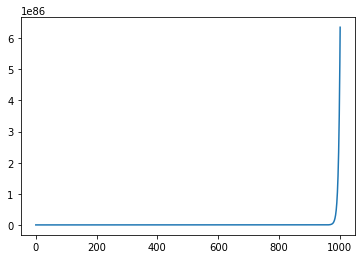

In [23]:
import matplotlib.pyplot as plt
plt.plot(fibonacci)

#페르마의 마지막 정리


<img src='https://w.namu.la/s/10f9de3bb9cb5221b1310160ab6fc019cda43199b8bd6e5f6264a71a7ebe692c4603ecd2220c1eb7ddf68698af14a29a7bbbe4e7c8a68f7d500e5da3c815a9b7f60d2893b03548aae5682e2da3d7f73819c8521d64bd0407ace7c78e4ccbce229f45290c8ef909f6a6b1fefa8add6664'>

페르마의 마지막 정리(Fermat's Last Theorem, FLT)는, '방정식 $x^n+y^n=z^n (n≥3)$에는 자명하지 않은 정수 해의 쌍 
$(x,y,z)$ 값이 존재하지 않는다.'라는 수학정리를 일컫는 말이다. 여기서 '마지막(Last)'이란 것은 페르마가 마지막으로 내놓은 정리가 아니라, 페르마가 남겨놓은 것 중 후대 수학자들이 마지막까지 증명하지 못했던 정리라는 의미다.

페르마(1607년 ~ 1665년 1월 12일)의 증명 방법은 거의 남아있지 않기 때문에 (가장 일반적으로 알려진 n=4승인 경우는 당시 페르마의 마지막 정리의 무한강하법을 통한 증명방법이 남아있다) 엄밀히 말하면 '페르마의 추측'이라고 부르는 것이 옳다. 그러나 페르마가 자신이 증명해 냈다는 주장을 존중하여 일반적으로 페르마의 마지막 정리라고 부른다. 이 정리는 20세기를 넘기기 직전인 1994년, 영국 수학자 앤드루 존 와일스 경(Sir Andrew John Wiles)이 증명했다.

수학 역사에 존재했던 여러 난제 중 가장 대중적이고 유명하다. 고대 그리스 시절의 수학을 제외하면 '난제'라고 불리는 문제들은 일반 대중들은 이해하는 것부터 불가능할 정도로 고차원적이고 복잡한 질문인데, 페르마의 마지막 정리는 대한민국 기준으로 중학교 수학 수업만 제대로 들었다면 다 알아들을 수 있다.하지만 그 쉬워보이는 질문에 장장 400년에 가까운 세월 동안 전 세계의 내로라 하는 모든 수학자들이 대답하지 못했다

결국 해를 거듭하며 일반인은 이해할 수조차 없는 복잡한 난제들이 증명되는 와중에도 이 간단한 수식 하나가 모든 수학자가 덤벼도 해결이 안 되자 수학자들의 자존심은 끝없이 곤두박질쳤고, 결국 증명하는 데에는 페르마 이전의 수학부터 페르마 사망 이후 350여 년 동안 전 세계 인류가 이거 하나를 증명하기 위해 뛰어들어, 심지어 전혀 관계가 없을 것 같던 다른 연구를 위해 추가로 쌓아 올린 수학까지, 수학이라는 학문의 정수가 총동원되어야만 했고, 결국 현대 수학의 최전선에서 간신히 이 난제가 증명되었다

In [24]:

def perma(d):
  for a in range(2,101):
      for b in range(2,101):
          for c in range(b+1,101):
                  if a**d==(b**d+c**d):
                      print("{},{},{}".format(a,b,c))
                  if a**d<(b**d+c**d):     
                    break    
  print('더는없다')          
for d in range(1,101):
  print(d,'제곱일때. a^2+b^2=c^2을 만족하는 수는')
  perma(d)


1 제곱일때. a^2+b^2=c^2을 만족하는 수는
5,2,3
6,2,4
7,2,5
7,3,4
8,2,6
8,3,5
9,2,7
9,3,6
9,4,5
10,2,8
10,3,7
10,4,6
11,2,9
11,3,8
11,4,7
11,5,6
12,2,10
12,3,9
12,4,8
12,5,7
13,2,11
13,3,10
13,4,9
13,5,8
13,6,7
14,2,12
14,3,11
14,4,10
14,5,9
14,6,8
15,2,13
15,3,12
15,4,11
15,5,10
15,6,9
15,7,8
16,2,14
16,3,13
16,4,12
16,5,11
16,6,10
16,7,9
17,2,15
17,3,14
17,4,13
17,5,12
17,6,11
17,7,10
17,8,9
18,2,16
18,3,15
18,4,14
18,5,13
18,6,12
18,7,11
18,8,10
19,2,17
19,3,16
19,4,15
19,5,14
19,6,13
19,7,12
19,8,11
19,9,10
20,2,18
20,3,17
20,4,16
20,5,15
20,6,14
20,7,13
20,8,12
20,9,11
21,2,19
21,3,18
21,4,17
21,5,16
21,6,15
21,7,14
21,8,13
21,9,12
21,10,11
22,2,20
22,3,19
22,4,18
22,5,17
22,6,16
22,7,15
22,8,14
22,9,13
22,10,12
23,2,21
23,3,20
23,4,19
23,5,18
23,6,17
23,7,16
23,8,15
23,9,14
23,10,13
23,11,12
24,2,22
24,3,21
24,4,20
24,5,19
24,6,18
24,7,17
24,8,16
24,9,15
24,10,14
24,11,13
25,2,23
25,3,22
25,4,21
25,5,20
25,6,19
25,7,18
25,8,17
25,9,16
25,10,15
25,11,14
25,12,13
26,2,24
26,3,23
26,4,22
26,5,21

#콜라츠 추측
로타르 콜라츠(Lothar Collatz)가 1937년에 제기한 추측. 페르마의 마지막 정리와 같이 수학자들을 고민에 빠트린 전설의 문제이다.

이에 대한 대표적인 권위자로 Jeffrey C.Lagarias 교수가 있다. Jeffrey Lagarias 교수는 2010년에 이 문제에 대한 알려진 정보만을 토대로 "이것은 현재의 수학에서 완전히 벗어난 매우 어려운 문제입니다"라고 주장했다.

**어떤 추측인가?**

이른바 "우박수" 또는 "우박 수열"이라는 이름으로 아는 사람이 많을 것이다. 이는 숫자가 커졌다 작아졌다를 반복하다 결국 1에 수렴하는 걸 비구름에서 빗방울이 오르락내리락하며 우박이 되는 모습에 빗대어 그렇게 부른다.


$T(n)=\begin{cases}\frac{n}{2}  &if \ n \ is \ even\\3n+1 & if \ n \ is \ odd\end{cases} $



이 함수 $T(n)$을 모든 자연수 n에 대해 유한번 재귀 반복하면 1로 간다는 추측이다.

이를 풀어서 설명하자면, 1을 제외한 아무 자연수나 생각한 다음 그게 홀수라면 3을 곱한 다음 1을 더하고, 짝수라면 2로 나눈다. 그렇게 나온 수를 다시 저 식에 집어 넣고 이하 반복, 이걸 계속하다 보면 1이 나온다는 것이다. 예를 들어 5에서 시작하면, 5는 홀수니까 3×5+1=16이 되고, 16은 짝수니까 16/2=8, 이후 4와 2를 거쳐 1에 도달하게 된다. 

이 추측의 반례는 아직 나오지 않았고, 아마도 참일 것으로 추정된다. 반례가 하나라도 나오는 순간 별다른 증명이 필요없이 저 추측은 거짓인 것으로 문제가 끝나기 때문이다. 이미 1980년대에 컴퓨터를 이용해 약 1해까지의 숫자를 넣어보았지만 모두 1에 도달했다.[2]

아무튼 이 추측은 80년이 넘도록 풀리지 않고 있다. 게다가 상금도 걸려 있다. 1000파운드와 500달러의 상금이 걸려 있는데, 이중 500달러의 상금을 건 사람은 에르되시 팔이다.[3] 또한 1.2억엔(약 11억)의 상금을 지급한다

약간 변형된 표현으로 

라고 나오기도 한다. 홀수에 대해서 3n+1 을 하면 무조건 짝수가 되는데, 그 다음 단계에서 2로 나누게 되므로 한단계를 생략하고 미리 2로 나눈 것이다. 이 수열의 끝이 1이냐 아니냐만 중요하기에 중간 단계를 간략화하는 것은 별다른 영향을 주지는 않는다. 다만, 최대 얼마까지 커지느냐를 따지는 경우라면 원래의 표현을 기준으로 해야 한다.

In [25]:
def collatz(n):
    print('시작 숫자:',end='')
    while n > 1:
        print(n, end=' ')
        if (n % 2):
            # n is odd
            n = 3*n + 1
        else:
            # n is even
            n = n//2
    print(1, end='')
 
 
for i in range(1,101):
  print(" ")
  collatz(i)

 
시작 숫자:1 
시작 숫자:2 1 
시작 숫자:3 10 5 16 8 4 2 1 
시작 숫자:4 2 1 
시작 숫자:5 16 8 4 2 1 
시작 숫자:6 3 10 5 16 8 4 2 1 
시작 숫자:7 22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1 
시작 숫자:8 4 2 1 
시작 숫자:9 28 14 7 22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1 
시작 숫자:10 5 16 8 4 2 1 
시작 숫자:11 34 17 52 26 13 40 20 10 5 16 8 4 2 1 
시작 숫자:12 6 3 10 5 16 8 4 2 1 
시작 숫자:13 40 20 10 5 16 8 4 2 1 
시작 숫자:14 7 22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1 
시작 숫자:15 46 23 70 35 106 53 160 80 40 20 10 5 16 8 4 2 1 
시작 숫자:16 8 4 2 1 
시작 숫자:17 52 26 13 40 20 10 5 16 8 4 2 1 
시작 숫자:18 9 28 14 7 22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1 
시작 숫자:19 58 29 88 44 22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1 
시작 숫자:20 10 5 16 8 4 2 1 
시작 숫자:21 64 32 16 8 4 2 1 
시작 숫자:22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1 
시작 숫자:23 70 35 106 53 160 80 40 20 10 5 16 8 4 2 1 
시작 숫자:24 12 6 3 10 5 16 8 4 2 1 
시작 숫자:25 76 38 19 58 29 88 44 22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1 
시작 숫자:26 13 40 20 10 5 16 8 4 2 1 
시작 숫자:27 82 41 124 62 31 94 47 142 71

In [26]:
### Full code
import random
import matplotlib.pyplot as plt

def collatz(num):
    loop = []
    for i in range(500):    # 500 번까지만 수행
        loop.append(int(num))
        if num == 1:         # 1이면 종료( 1 * 3( + 1) = 4 / 2 = 2 / 2 = 1 (반복)
            break
        elif num % 2 == 0:    # 짝수면
            num = num/2      # 2로 나눔
        elif num % 2 == 1:  # 홀수면 
            num = (num*3)+1  # * 3 + 1
    return loop

data = []      # 콜랕츠추측 path
data_len = []  # 추측의 단계수
ad=[]
for i in range(100):
    # n = random.randrange(1, 100)
    n = i + 1
    rtn = collatz(n)
    data.append(rtn)
    data_len.append(len(rtn))
    ad.append(len(rtn))
    #print(data)

fig = plt.figure(figsize=(14, 7))
plt.plot(data_len)
plt.figure()
for i in range(len(data)):
    plt.plot(data[i], label='loop' + str(i+1))
plt.title('MAX step=' + str(max(data_len)))
#plt.legend()
plt.grid()
plt.show()